<a href="https://colab.research.google.com/github/Noah-B-Reef/math/blob/main/Collatz_Conjecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Collatz Conjecture
The Collatz Conjecture is defined for sequences that are as follows: "Start with a positive integer $n$, the next term of the seuqence is obtained from the previous as follows: If the previous term is **odd**, the next term is $3$ times the previous term plus $1$, if the previous term is **even**, the next term is half the previous term." The *Collatz Conjecture* postis all non-negative integers $n$ , will resolve to '1'. We call any $n$ that resolves to '1' a *Collatz Number*. The following code will calculate the sequence for the first 50 $n$:

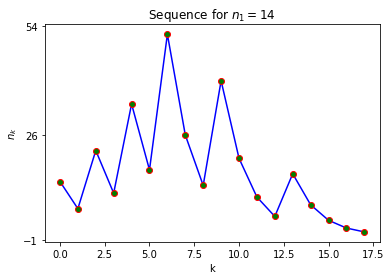

[14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Resolved to '1' in 17 steps!


In [ ]:
# Install Required Dependenicies
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import math

# Intializes the starting positive integer 'n'
n = 14

# Create a sequence list to store terms of the sequence and alterable copy of 'n' as 'num'
sequence = []
num = n

# Adds the first number of the sequence to the 'sequence' list
sequence.append(int(num))

# Iterates through the procedure until num is '1'
while num > 1:

  # If even divide by two
  if num % 2 == 0:
    num /= 2

  # If odd multiply by 3 and add 1
  else:
    num = 3*num + 1

  # Add new number to the sequence
  sequence.append(int(num))


# Plots each element of the sequence with its respective step.
y = sequence
plt.xlabel('k')
plt.ylabel('$n_k$')
plt.title("Sequence for $n_1 = " + str(n) + "$")
ax = plt.gca()
ax.plot(y, 'b', marker="o",markeredgecolor="red", markerfacecolor="green")

#- define your own locator based on ticker.LinearLocator
class MyLocator(ticker.LinearLocator):
   def tick_values(self, vmin, vmax):
       "vmin and vmax are the axis limits, return the tick locations here"
       return [int(vmin), int(0.5 * (vmin + vmax)), int(vmax)]

#- initiate the locator and attach it to the current axis
ML = MyLocator()
ax.yaxis.set_major_locator(ML)
plt.show()
print(sequence)
print("Resolved to '1' in " + str(len(sequence) - 1) + " steps!")

[0, 1, 7, 2, 5, 8, 16, 3, 19, 6, 14, 9, 9, 17, 17, 4, 12, 20, 20, 7, 7, 15, 15, 10, 23, 10, 111, 18, 18, 18, 106, 5, 26, 13, 13, 21, 21, 21, 34, 8, 109, 8, 29, 16, 16, 16, 104, 11, 24, 24, 24, 11, 11, 112, 112, 19, 32, 19, 32, 19, 19, 107, 107, 6, 27, 27, 27, 14, 14, 14, 102, 22, 115, 22, 14, 22, 22, 35, 35, 9, 22, 110, 110, 9, 9, 30, 30, 17, 30, 17, 92, 17, 17, 105, 105, 12, 118, 25, 25, 25]


<BarContainer object of 100 artists>

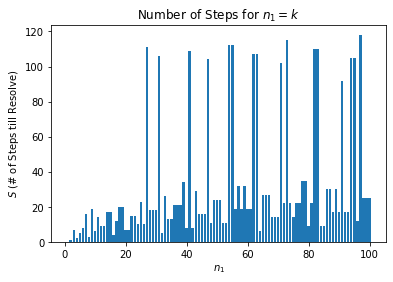

In [ ]:
# Plots the number of steps till one for each Collatz Number on a Bar Graph
n = 1
stopping = 100
sequences_length = []
while n <= stopping:
  sequence = []
  num = n
  sequence.append(int(num))
  while num > 1:
    if num % 2 == 0:
      num /= 2
    else:
      num = 3*num + 1
    sequence.append(int(num))
  sequences_length.append(len(sequence) - 1)
  n += 1

print(sequences_length)

# Plots each element of the sequence with its respective step.
y = sequences_length
plt.xlabel('$n_1$')
plt.ylabel('$S$ (# of Steps till Resolve)')
plt.title("Number of Steps for $n_1 = k$")
ax = plt.gca()
ax.bar(range(1,len(sequences_length) + 1), y)


# Some Things Worth Considering
We can see that any **even** number can be represented as $n_{even} = 2t$ and any **odd** number can be represented as $n_{odd} = 2t + 1$, where $t \in \mathbb{N}$. It is also easy to see that all $n_1 = 2^{t}$ we resolve to $1$ in $t$ steps. 

## *Proof 1.1*
Suppose that $n_1 = 2^t$ that is,
\begin{equation*}
n_1 = 2 (2^{t-1})
\end{equation*}
Hence we see that $n_1$ is *even*, thus the $n_{2}$ is calculated by
\begin{equation*}
n_2 = \frac{2(2^{t-1})}{2} = 2^{t-1} = 2(2^{t-2})
\end{equation*}
Hence we see that $n_2$ is *even* and thus $n_3$ is calculated by
\begin{equation*}
n_3 = \frac{2(2^{t-2})}{2} = 2^{t-2} = 2(2^{t-3})
\end{equation*}
We continue this process until
\begin{equation*}
n_{t+1} = \frac{2(2^{t - t})}{2} = 2^{0} = 1
\end{equation*}
Thus we see it takes $t$ steps until $n_1 = 2^t$ resolves to '1'

One way to easily disprove the *Collatz Conjecture* would be to prove the existence of sequence that continually increased. 

## *Proof 1.2*
Suppose $n_k$ is an *odd* number, that is
\begin{equation*}
n_k = 2t + 1
\end{equation*}
where $t$ is a non-negative integer. The $n_{k + 1}$ term is calculated by the follwing,
\begin{equation*}
n_{k+1} = 3(n_k) + 1
\end{equation*}
\begin{equation*}
n_{k+1} = 3(2t + 1) + 1
\end{equation*}
\begin{equation*}
n_{k+1} = 6t + 4 = 2(3t + 2)
\end{equation*}
thus if we let $t' = 3t + 2$ we see that
\begin{equation*}
n_{k+1} = 2t'
\end{equation*}
Hence we see that $n_{k+1}$ is an *even* number.

In [ ]:
# Writes data for different n_1's and steps to Google Sheets file
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint
import time

scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("/content/drive/MyDrive/Collatz Conjecture Material/collatz-conjecture-330523-e4d83bb8eb5c.json", scope)

client = gspread.authorize(creds)

sheet = client.open("Collatz Conjecture Data").sheet1

data = sheet.get_all_records()\

# Writes steps of sequences_length to google sheets file
for i in range(1749,len(sequences_length)):
  time.sleep(2)
  insertRow = [i+1, sequences_length[i]]
  sheet.insert_row(insertRow, i+1)



In [ ]:
# Manipulates and Analyizes data from CSV file of the Google Sheets file
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Collatz Conjecture Material/Collatz Conjecture Data - Sheet1.csv")
data.info()
data.describe()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   n_1     1999 non-null   int64
 1   steps   1999 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


,n_1,steps
0,2,1
1,3,7
2,4,2
3,5,5
4,6,8
...,...,...
1994,1996,50
1995,1997,50
1996,1998,50
1997,1999,50


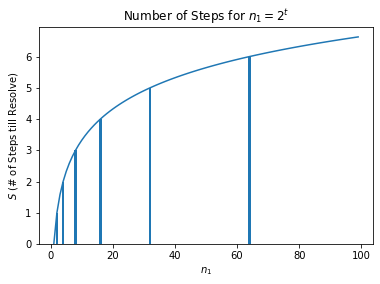

In [ ]:
# Shows that each n_1 = 2**t for some non-negative t
numsPowersOfTwo = []
stepsForPowerOfTwo = []
for i in range(1,len(sequences_length)):
  if math.log2(i+1) == sequences_length[i]:
    numsPowersOfTwo.append(i+1)
    stepsForPowerOfTwo.append(sequences_length[i])

t = numsPowersOfTwo
s = stepsForPowerOfTwo

plt.xlabel('$n_1$')
plt.ylabel('$S$ (# of Steps till Resolve)')
plt.title("Number of Steps for $n_1 = 2^t$")
ax = plt.gca()
x = np.arange(1,len(sequences_length))
y = np.log2(x)
ax.plot(x,y)
ax.bar(t,s)
plt.show()

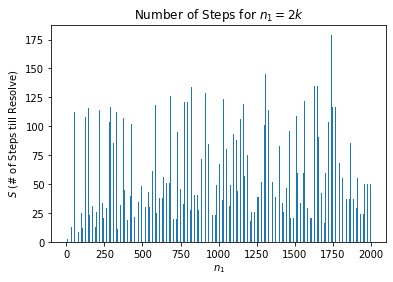

In [ ]:
# Plots the number of steps for the Even Collatz Numbers
h = sequences_length[1::2]
x = range(2, (len(sequences_length) + 1),2)
plt.xlabel('$n_1$')
plt.ylabel('$S$ (# of Steps till Resolve)')
plt.title("Number of Steps for $n_1 = 2k$")
ax = plt.gca()

ax.bar(x, h)
plt.show()



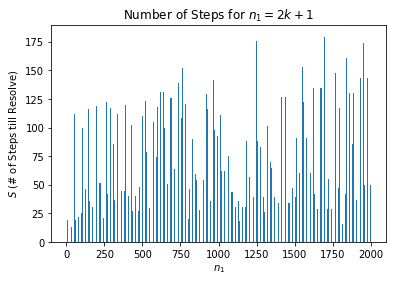

In [ ]:
# Plots the number of steps for the Odd Collatz Numbers
z = sequences_length[2::2]
w = range(3, (len(sequences_length) + 1),2)
plt.xlabel('$n_1$')
plt.ylabel('$S$ (# of Steps till Resolve)')
plt.title("Number of Steps for $n_1 = 2k + 1$")
ax = plt.gca()

ax.bar(w, z)
plt.show()